In [ ]:
#importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#loading dateset into a dataframe and checking for the number of columns and rows
bank=pd.read_csv("merged data_10X.csv")
print(bank.shape)
print(bank.columns)

(15470, 14)
Index(['ID', 'cf_td', 'ca_cl', 're_ta', 'ni_ta', 'td_ta', 's_ta', 'wc_ta',
       'wc_s', 'c_cl', 'cl_e', 'in_s', 'mve_td', 'bstatus'],
      dtype='object')


In [ ]:
#checking for the data type of columns 
print(bank.dtypes)
print(bank.info())
print(bank.describe())

ID           int64
cf_td      float64
ca_cl      float64
re_ta      float64
ni_ta      float64
td_ta      float64
s_ta       float64
wc_ta      float64
wc_s       float64
c_cl       float64
cl_e       float64
in_s       float64
mve_td     float64
bstatus      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15470 entries, 0 to 15469
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       15470 non-null  int64  
 1   cf_td    15470 non-null  float64
 2   ca_cl    15470 non-null  float64
 3   re_ta    15470 non-null  float64
 4   ni_ta    15470 non-null  float64
 5   td_ta    15470 non-null  float64
 6   s_ta     15470 non-null  float64
 7   wc_ta    15470 non-null  float64
 8   wc_s     15470 non-null  float64
 9   c_cl     15470 non-null  float64
 10  cl_e     15470 non-null  float64
 11  in_s     15470 non-null  float64
 12  mve_td   15470 non-null  float64
 13  bstatus  15470 non-null  int64  
dty

In [ ]:
#check if the dataset has any null values
print(bank.isnull().sum())
print(bank.head())
#dropping the column ID as it doesn't add any value to the dataset
bank= bank.drop(['ID'], axis=1)
#checking the shape again to makesure ID column is dropped from the dataset
print(bank.shape)

ID         0
cf_td      0
ca_cl      0
re_ta      0
ni_ta      0
td_ta      0
s_ta       0
wc_ta      0
wc_s       0
c_cl       0
cl_e       0
in_s       0
mve_td     0
bstatus    0
dtype: int64
   ID     cf_td     ca_cl      re_ta     ni_ta     td_ta      s_ta     wc_ta  \
0   1 -0.272767  1.377092  -0.022256 -0.115008  0.408842  1.309895  0.266947   
1   2 -0.136488  0.106107  -0.556599 -0.219810  1.091245  0.818140 -1.159255   
2   3 -0.282272  1.071777  -0.562102 -0.282680  0.268303  1.401746  0.040862   
3   4 -0.303333  0.214162 -12.228137  0.106464  1.140684  2.239544 -1.730038   
4   5 -0.539683  0.827048  -3.563087 -0.198123  0.197080  1.443170 -0.138686   

       wc_s      c_cl      cl_e      in_s    mve_td  bstatus  
0  0.203793  0.009092  2.483959  0.355742  0.595134        1  
1 -1.416939  0.031919 -4.138730  0.003958  0.042403        1  
2  0.029151  0.117942  3.702331  0.182852  0.111444        1  
3 -0.772496  0.041451 -0.941463  0.033956  1.798000        1  
4 -0.0960

0    11850
1     3620
Name: bstatus, dtype: int64

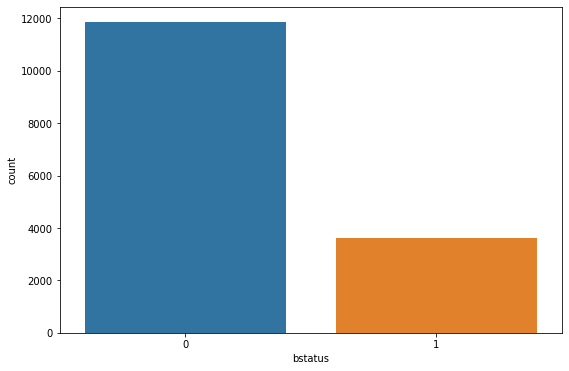

In [ ]:
#box plot to see the the number of bankrupcy status 0= not going for bankruptcy and 1=banktuptcy
plt.figure(figsize=(9,6))
sns.countplot(x='bstatus',data = bank)
bank["bstatus"].value_counts()

In [ ]:
#checking the variance for the columns
bank.var()

cf_td      7.201292e+04
ca_cl      9.606881e+00
re_ta      1.437579e+01
ni_ta      7.424558e-01
td_ta      1.948379e-01
s_ta       1.172950e+00
wc_ta      5.294372e-01
wc_s       6.318162e+02
c_cl       2.999637e+00
cl_e       4.253893e+03
in_s       6.920956e+00
mve_td     2.462989e+07
bstatus    1.792563e-01
dtype: float64

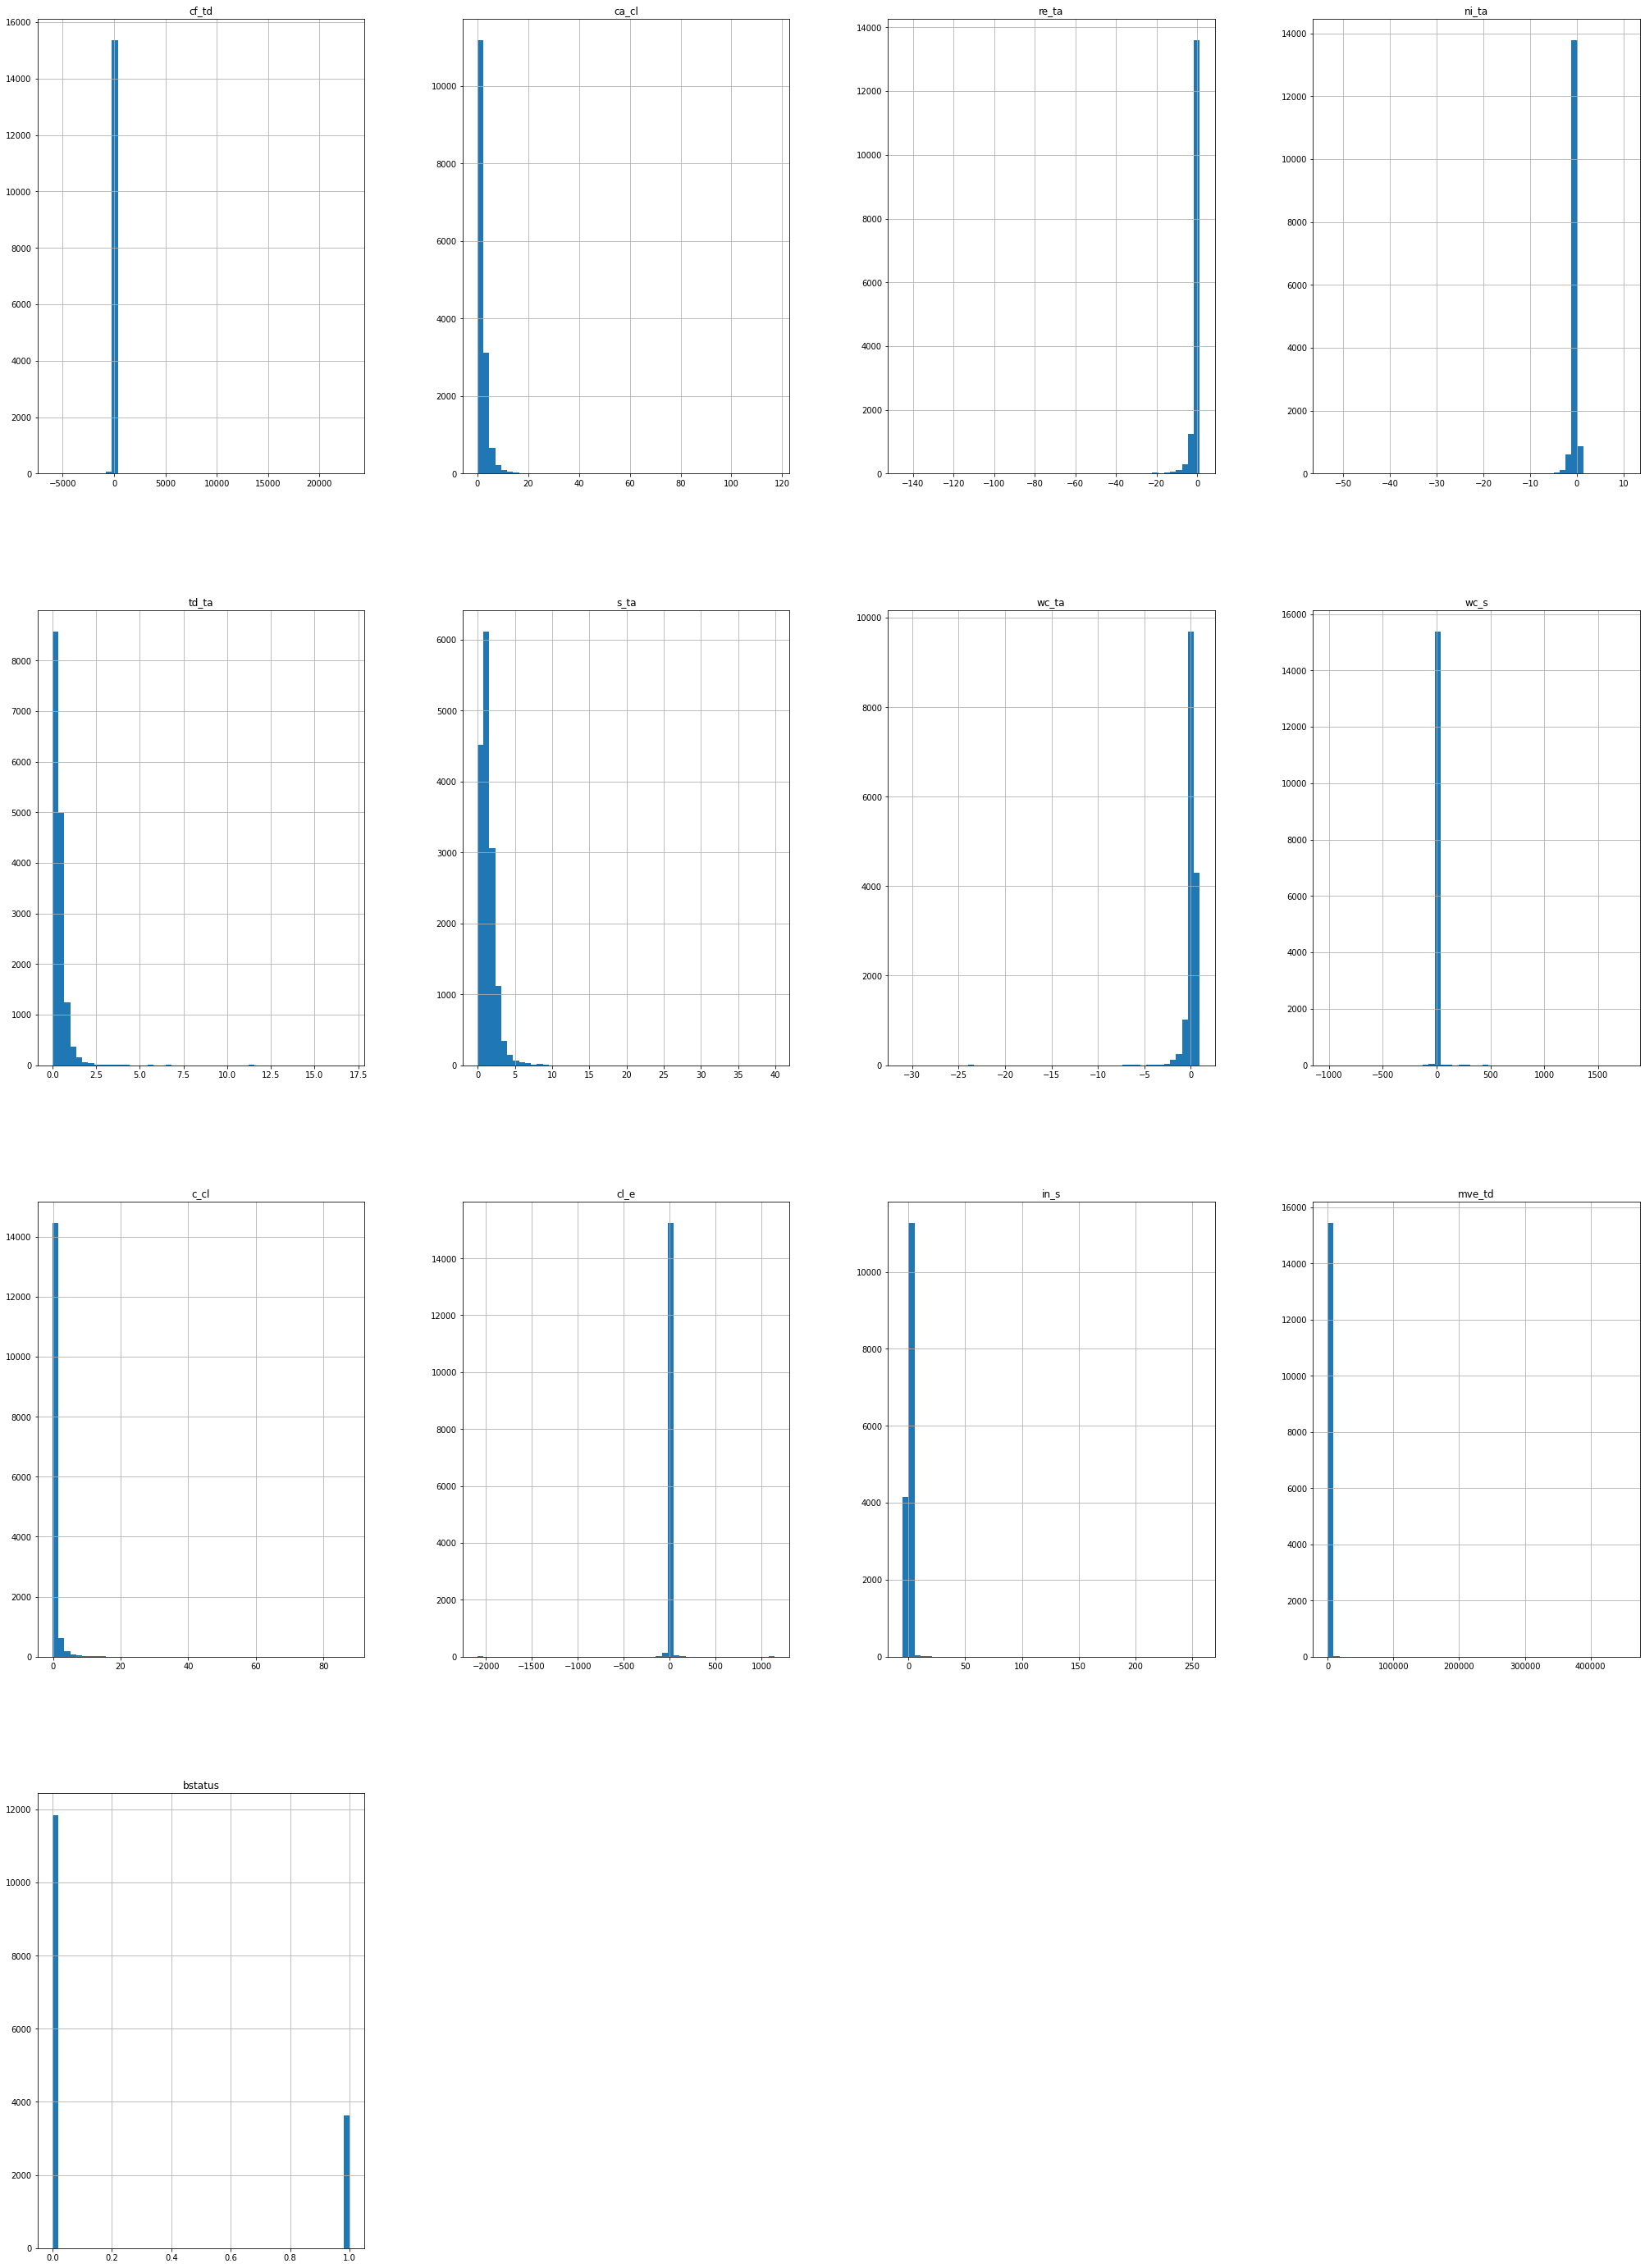

In [ ]:
#Checking the standard deviation between the columns
bank.std()
bank.hist(figsize = (35,50), bins = 50)
plt.show()


cf_td      7.201292e+04
ca_cl      8.286339e-01
re_ta      1.437579e+01
ni_ta      7.424558e-01
td_ta      1.948379e-01
s_ta       1.172950e+00
wc_ta      5.294372e-01
wc_s       6.318162e+02
c_cl       2.999637e+00
cl_e       4.253893e+03
in_s       6.920956e+00
mve_td     2.462989e+07
bstatus    1.792563e-01
dtype: float64


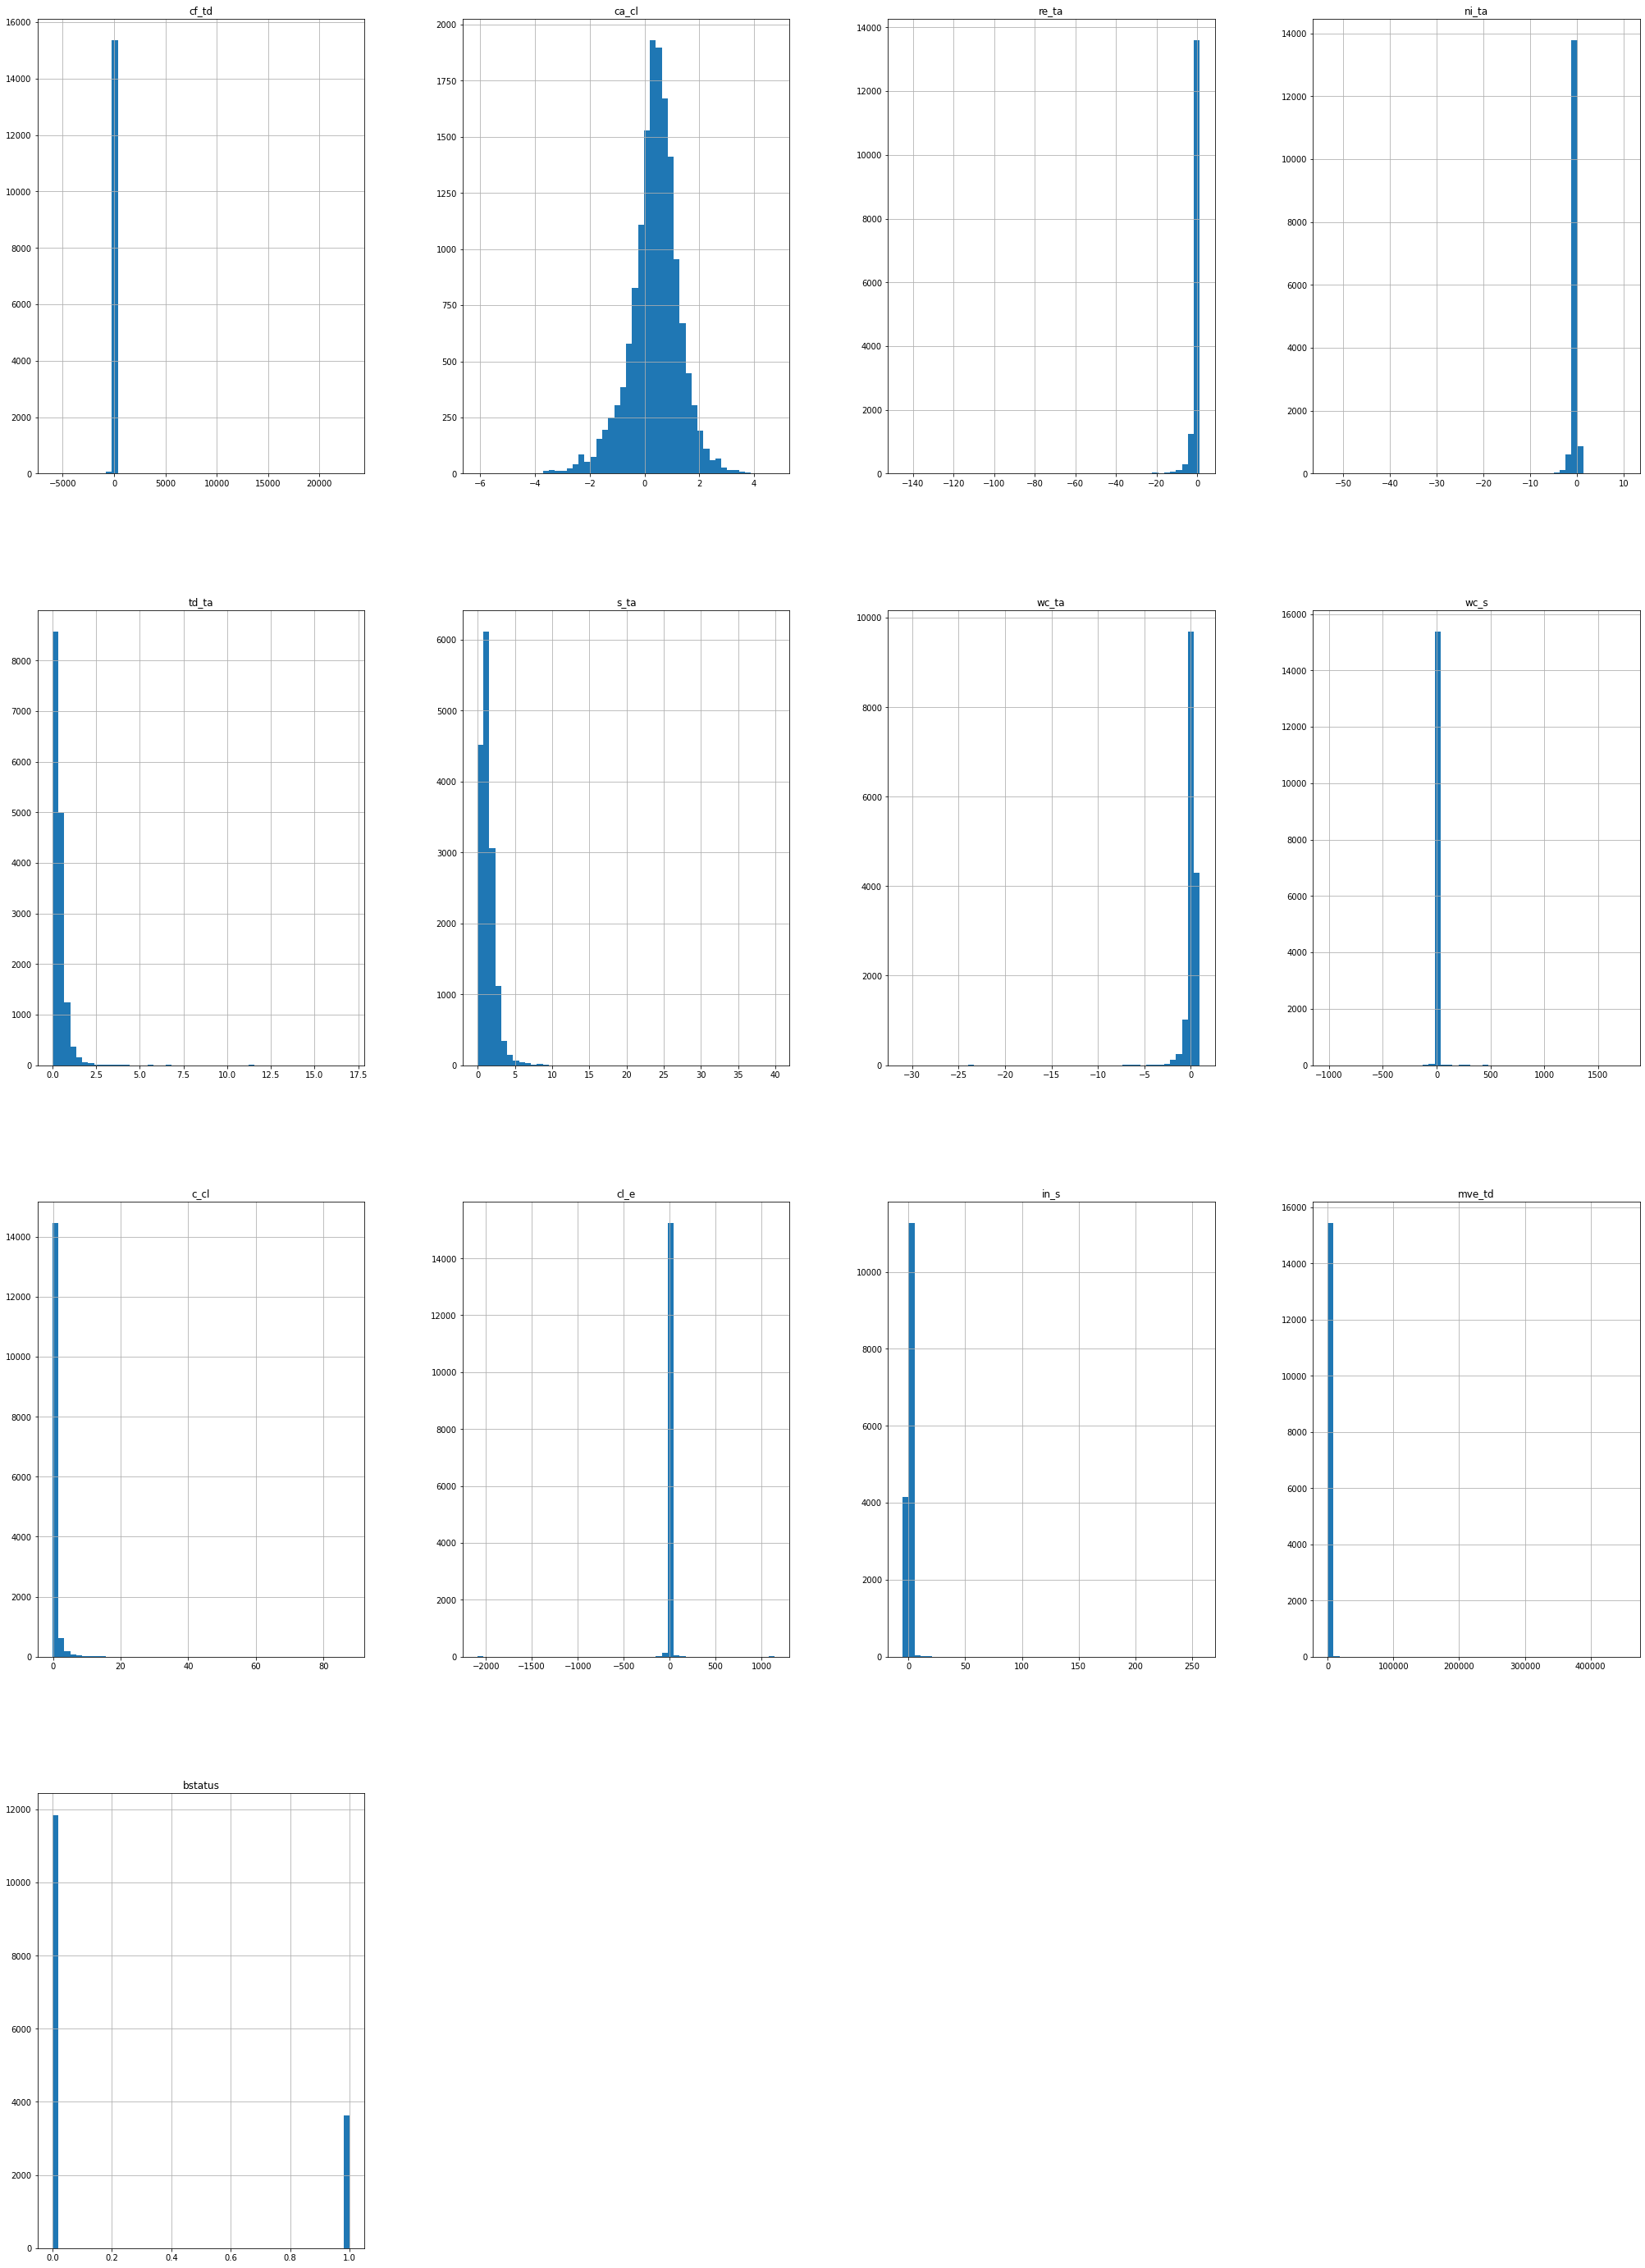

In [ ]:
#Log Normalizing the Ca_Cl column as it has high variance didn't normalize other columns as it has negative values and 
#taking log makes them undefined
bank_norm = bank.copy()
bank_norm['ca_cl'] = np.log(bank_norm['ca_cl'])
print(bank_norm.var())
bank_norm.hist(figsize = (35,50), bins = 50)
plt.show()

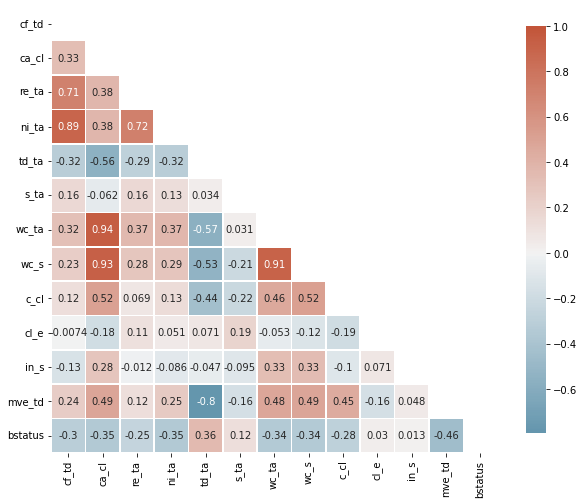

In [ ]:
#plotting heat map to see the correlation 

from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 15))
mat = bank_norm.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

In [ ]:
#checking for corelation
print(bank_norm.corr())

            cf_td     ca_cl     re_ta     ni_ta     td_ta      s_ta     wc_ta  \
cf_td    1.000000 -0.000505  0.032123  0.062988 -0.002114  0.031486  0.006098   
ca_cl   -0.000505  1.000000  0.266984  0.279020 -0.484896 -0.087125  0.625759   
re_ta    0.032123  0.266984  1.000000  0.576660 -0.501766 -0.055894  0.626650   
ni_ta    0.062988  0.279020  0.576660  1.000000 -0.337145 -0.071949  0.426746   
td_ta   -0.002114 -0.484896 -0.501766 -0.337145  1.000000  0.054984 -0.753700   
s_ta     0.031486 -0.087125 -0.055894 -0.071949  0.054984  1.000000 -0.095281   
wc_ta    0.006098  0.625759  0.626650  0.426746 -0.753700 -0.095281  1.000000   
wc_s    -0.011196  0.124131  0.011526  0.011134 -0.054211 -0.039852  0.077712   
c_cl    -0.015791  0.387426  0.010088  0.011278 -0.132585 -0.159117  0.153546   
cl_e     0.000042 -0.024744  0.008486  0.015029 -0.010398 -0.034169 -0.009522   
in_s    -0.007353  0.056966 -0.022013 -0.021411  0.004011 -0.064631  0.020633   
mve_td   0.679453  0.047972 

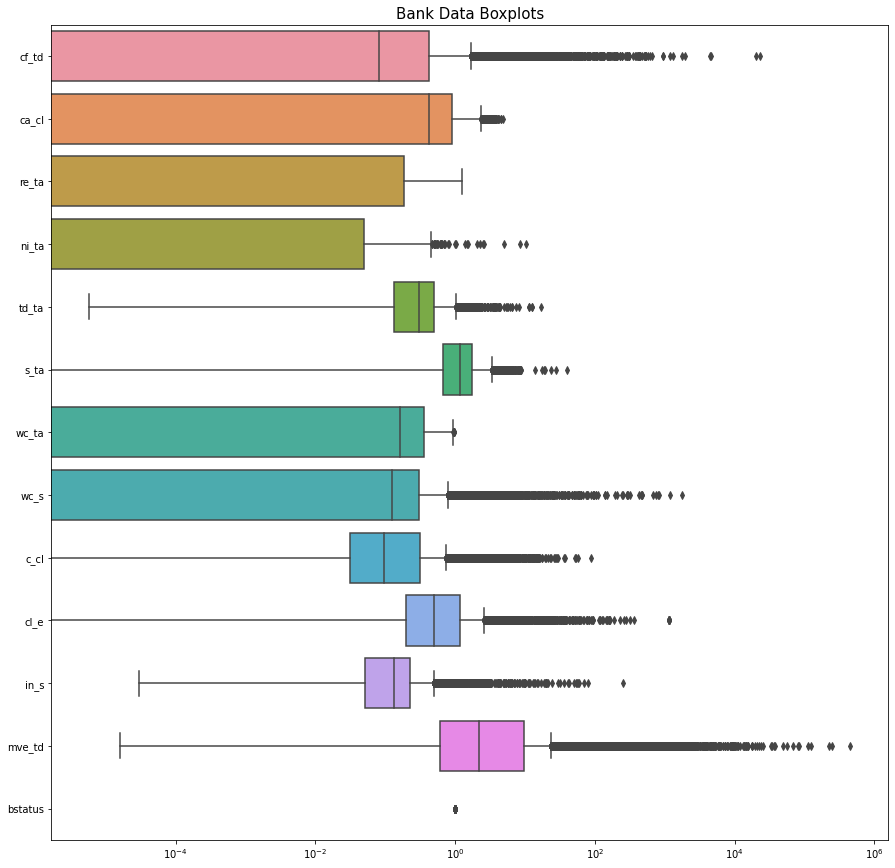

In [ ]:
#plotting box plots to see if there are any outliers in our dataset
plt.figure(figsize = (15,15))
ax =sns.boxplot(data = bank_norm, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 15)
ax.set(xscale="log")
plt.show()

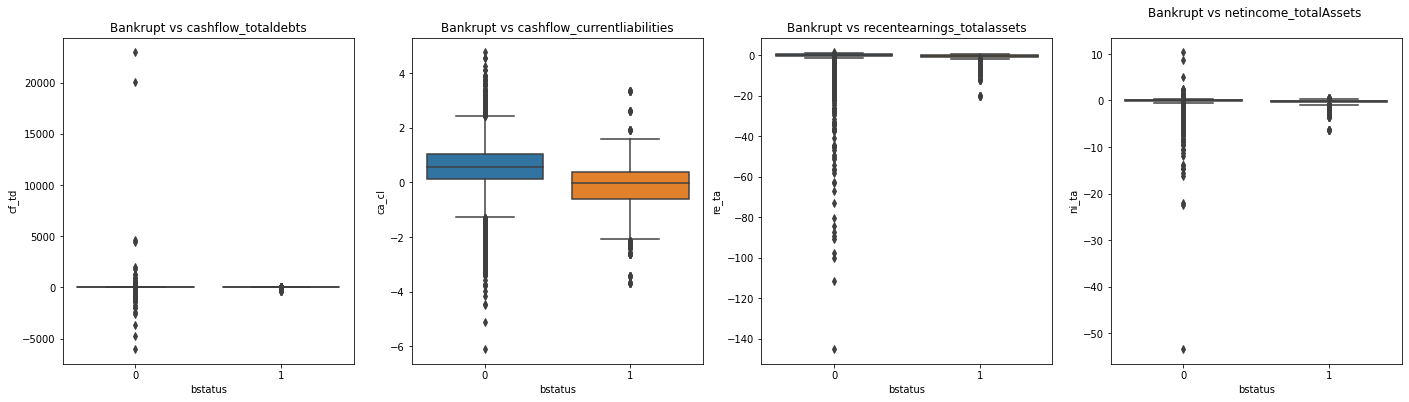

In [ ]:
#plotting individual box plots to see the exact number where the outliers falls for all the columns in the data set
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='bstatus', y="cf_td", data=bank_norm, ax=axes[0])
axes[0].set_title('Bankrupt vs cashflow_totaldebts')

sns.boxplot(x='bstatus', y="ca_cl", data=bank_norm, ax=axes[1]) 
axes[1].set_title('Bankrupt vs cashflow_currentliabilities')


sns.boxplot(x='bstatus', y="re_ta", data=bank_norm, ax=axes[2])
axes[2].set_title('Bankrupt vs recentearnings_totalassets')


sns.boxplot(x='bstatus', y="ni_ta", data=bank_norm, ax=axes[3])  
axes[3].set_title('Bankrupt vs netincome_totalAssets \n' )

plt.show()

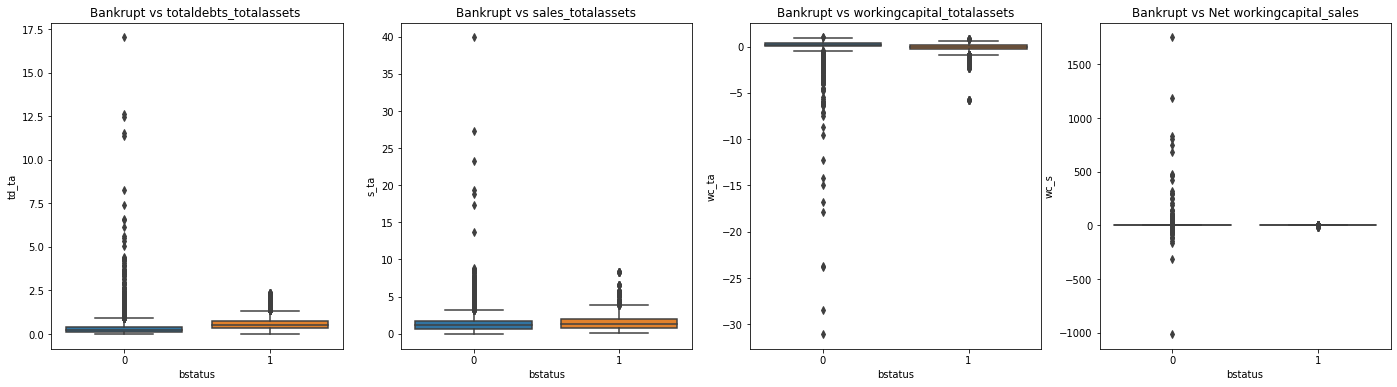

In [ ]:
#plotting individual box plots to see the exact number where the outliers falls for all the columns in the data set

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='bstatus', y="td_ta", data=bank_norm, ax=axes[0])
axes[0].set_title('Bankrupt vs totaldebts_totalassets ')

sns.boxplot(x='bstatus', y="s_ta", data=bank_norm, ax=axes[1]) 
axes[1].set_title('Bankrupt vs sales_totalassets')


sns.boxplot(x='bstatus', y="wc_ta", data=bank_norm, ax=axes[2])
axes[2].set_title('Bankrupt vs workingcapital_totalassets')


sns.boxplot(x='bstatus', y="wc_s", data=bank_norm, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net workingcapital_sales') 

plt.show()


In [ ]:
#plotting individual box plots to see the exact number where the outliers falls for all the columns in the data set
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='bstatus', y="c_cl", data=bank_norm, ax=axes[0])  
axes[0].set_title('Bankrupt vs cash_currentliabilities') 


sns.boxplot(x='bstatus', y="cl_e", data=bank_norm, ax=axes[1])  
axes[1].set_title('Bankrupt vs currentliabilities_earnings') 

sns.boxplot(x='bstatus', y="in_s", data=bank_norm, ax=axes[2])  
axes[2].set_title('Bankrupt vs Net Worth/Assets Correlation') 

sns.boxplot(x='bstatus', y="mve_td", data=bank_norm, ax=axes[3])  
axes[3].set_title('Bankrupt vs marketvalue_totaldebts') 

plt.show()

In [ ]:
#used scatter plots to see the outliers
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['cf_td'], bank_norm['bstatus'])
ax.set_xlabel('cf_td')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['cf_td'].skew())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['in_s'], bank_norm['bstatus'])
ax.set_xlabel('in_s')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['in_s'].skew())


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['mve_td'], bank_norm['bstatus'])
ax.set_xlabel('mve_td')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['mve_td'].skew())


#removing records with cf_td value greater than 20000 as from scatter plots we can clearly see they are outliers 
bank_norm = bank_norm[bank_norm["cf_td"]<=20000.0]

#removing records with cf_td value greater than 200 as from scatter plots we can clearly see they are outliers
bank_norm = bank_norm[bank_norm["in_s"]<=200.0]

#removing records with cf_td value greater than 200000 as from scatter plots we can clearly see they are outliers
bank_norm = bank_norm[bank_norm["mve_td"]<=200000.0]


In [ ]:
#removing records with cf_td value greater than 20000 as from scatter plots we can clearly see they are outliers 
bank_norm = bank_norm[bank_norm["cf_td"]<=20000.0]

#removing records with cf_td value greater than 200 as from scatter plots we can clearly see they are outliers
bank_norm = bank_norm[bank_norm["in_s"]<=200.0]

#removing records with cf_td value greater than 200000 as from scatter plots we can clearly see they are outliers
bank_norm = bank_norm[bank_norm["mve_td"]<=200000.0]


#plotting scatter plots again to see that data without outliers/after outliers are removed
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['cf_td'], bank_norm['bstatus'])
ax.set_xlabel('cf_td')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['cf_td'].skew())

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['in_s'], bank_norm['bstatus'])
ax.set_xlabel('in_s')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['in_s'].skew())


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bank_norm['mve_td'], bank_norm['bstatus'])
ax.set_xlabel('mve_td')
ax.set_ylabel('bstatus')
plt.show()
print(bank_norm['mve_td'].skew())


print(bank.shape)
print(bank_norm.shape)

In [ ]:
#dividing dataset into predictors and target variables 
bank_norm_x = bank_norm.drop(["bstatus"],axis=1)
bank_norm_y=bank_norm["bstatus"]

#dividing the dataset into train and test

from sklearn.model_selection import train_test_split
bank_norm_x_train, bank_norm_x_test, bank_norm_y_train, bank_norm_y_test = train_test_split(bank_norm_x, bank_norm_y, test_size = 0.2, random_state = 17)

#feature scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
bank_norm_x_train = sc.fit_transform(bank_norm_x_train)
bank_norm_x_test = sc.transform(bank_norm_x_test)

#building the models
#1. Building decision tree 

from sklearn.tree import DecisionTreeClassifier
bank_classifier = DecisionTreeClassifier(random_state = 0,max_depth=4, min_samples_split=10, min_samples_leaf=1)
bank_classifier.fit(bank_norm_x_train,bank_norm_y_train)
print('Decision Tree classification R squared": %.4f' % bank_classifier.score(bank_norm_x_test, bank_norm_y_test))

In [ ]:
# Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = bank_classifier.predict(bank_norm_x_test)
lin_mse = mean_squared_error(y_pred, bank_norm_y_test)
lin_rmse = np.sqrt(lin_mse)
print('Decision tree RMSE: %.4f' % lin_rmse)


from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(bank_classifier, 
#                   feature_names=bank_norm_x.columns,  
#                   class_names=bank_norm_y.columns,
                   filled=True)
fig.savefig("dtree.png")

_ = tree.export_graphviz(bank_classifier,
                     out_file="tree_graphviz.dot",
#                     feature_names = fn, 
#                     class_names=cn,
                     filled = True)

In [ ]:
print(dict(zip(bank_norm_x.columns, bank_classifier.feature_importances_)))

In [ ]:
#model 2
#BUilding Random Forest 

from sklearn.ensemble import RandomForestClassifier
bank_forest_class = RandomForestClassifier(n_estimators = 1000,random_state = 0)
bank_forest_class.fit(bank_norm_x_train, bank_norm_y_train)
print('Random Forest R squared": %.4f' % bank_forest_class.score(bank_norm_x_test, bank_norm_y_test))

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = bank_forest_class.predict(bank_norm_x_test)
bank_forest_mse = mean_squared_error(y_pred, bank_norm_y_test)
bank_forest_rmse = np.sqrt(bank_forest_mse)
print('Random Forest RMSE: %.4f' % bank_forest_rmse)

In [ ]:
print(dict(zip(bank_norm_x.columns, bank_forest_class.feature_importances_)))

In [ ]:
# Create your classifier here /KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Fitting classifier to the Training set
classifier.fit(bank_norm_x_train,bank_norm_y_train)

# Predicting the Test set results
y_pred = classifier.predict(bank_norm_x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(bank_norm_y_test, y_pred)
print(cm)
report = classification_report(bank_norm_y_test, y_pred)
print(report)


In [ ]:
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(bank_norm_x_train,bank_norm_y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(bank_norm_x_train, bank_norm_y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(bank_norm_x_test, bank_norm_y_test)

# Generate plot
plt.figure()
plt.title('bankruptcy status')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#from the graph below we can see that our k is 9

In [ ]:
#checking the graph by taking K as 9
neighbors = np.arange(1, 18)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(bank_norm_x_train,bank_norm_y_train)
 
# Generate plot
plt.figure()
plt.title('bankruptcy status')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(bank_norm_x_train, bank_norm_y_train, batch_size = 20, epochs = 10)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(bank_norm_x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(bank_norm_y_test, y_pred)
print(cm)
